In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blank with 0 as tenure is 0 and no total charges are recorded also we have converted the data type into float

In [125]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [128]:
df.isnull().sum().sum()

np.int64(0)

In [129]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [130]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [131]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [132]:
df.duplicated().sum()

np.int64(0)

In [133]:
df["customerID"].duplicated().sum()

np.int64(0)

In [134]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [135]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


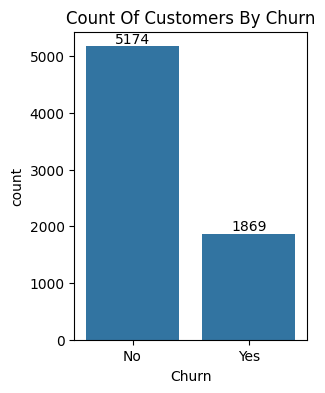

In [136]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn")
plt.show()

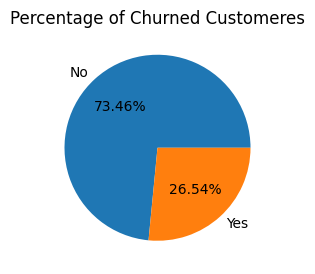

In [137]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres")
plt.show()

# * from the given pie char we can conclude that 26.54% of our customers have churned out
## * now let's explore the reason behind it


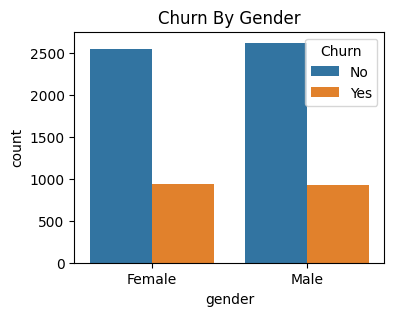

In [138]:
plt.figure(figsize = (4,3))
sns.countplot(x ="gender" , data = df, hue = "Churn")
plt.title("Churn By Gender")
plt.show()

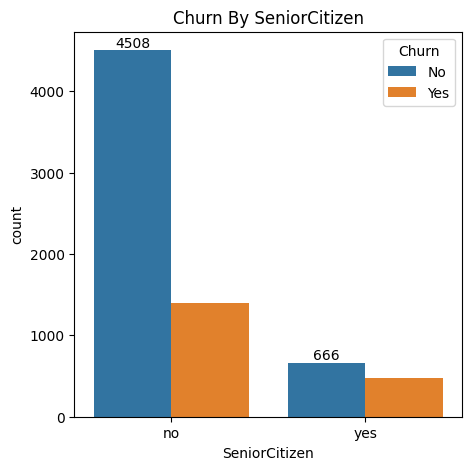

In [139]:
plt.figure(figsize = (5,5))
ax=sns.countplot(x ="SeniorCitizen" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn By SeniorCitizen")
plt.show()

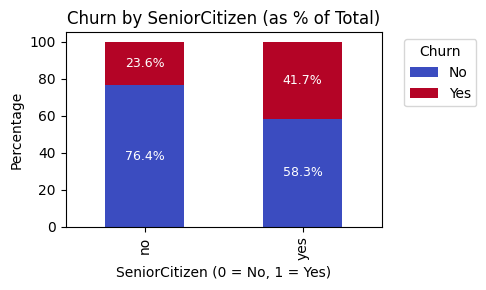

In [140]:
# Create a cross-tab of SeniorCitizen vs Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert to percentage of total
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ct_percent.plot(kind='bar', stacked=True, figsize=(5,3), colormap='coolwarm')

# Add percentage labels on bars
for i, row in enumerate(ct_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            plt.text(i, cum_sum + val/2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=9)
        cum_sum += val

# Formatting
plt.title("Churn by SeniorCitizen (as % of Total)")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#Comparatively a greated percentage of people in senior citizen category have churned

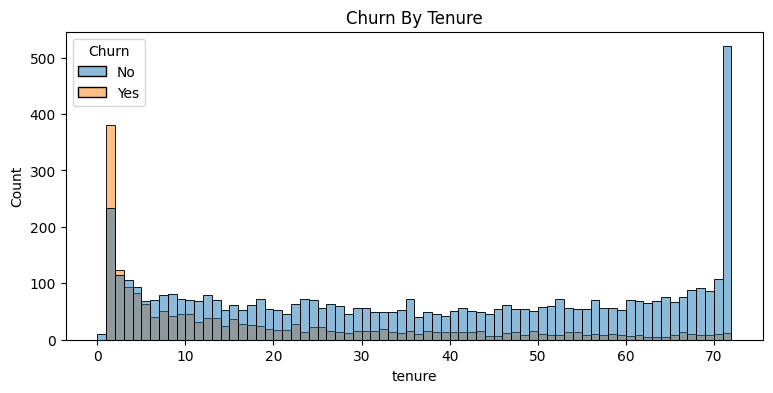

In [141]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure", data = df , bins =72 , hue="Churn")
plt.title("Churn By Tenure")
plt.show()

#people who have used our services for long time are conected with use...and people who have used our services for one or two months have churned

#   **now we will find it out why the early user are churned out by analysing the contract data and many more as well


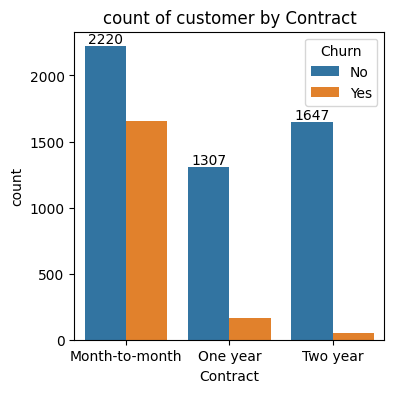

In [142]:
plt.figure(figsize = (4,4))
ax= sns.countplot(x = "Contract" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by Contract")
plt.show()

#By looking at this stats we can say that the people who are taking month-to-month plane are churning out...so we have to make a palne and we have to convince people so that they can take one or two year contract which increases less chance of churn

In [143]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

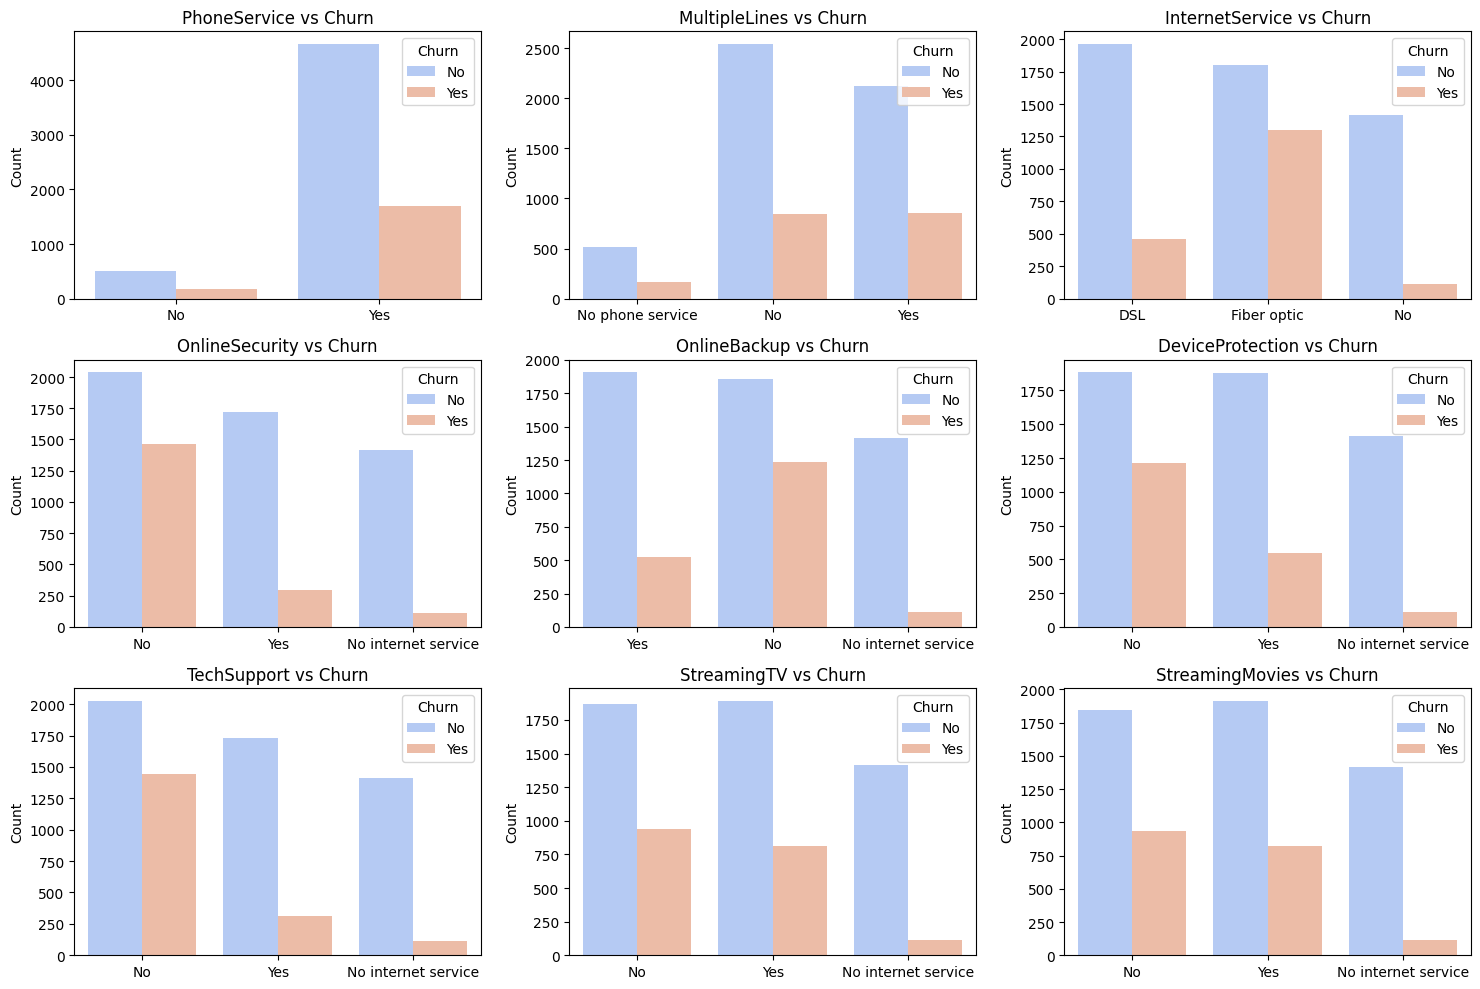

In [146]:
# List of columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid size — adjust automatically
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df, hue='Churn', palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

#The majority of customer who do not churn tend to have services like phoneservice,internetservice(particularly DSL),and online security enabled.for services like onlinebackup,techsupport,and streamingTV,churn rates are noticeably higher when these services are not used or are unavailable


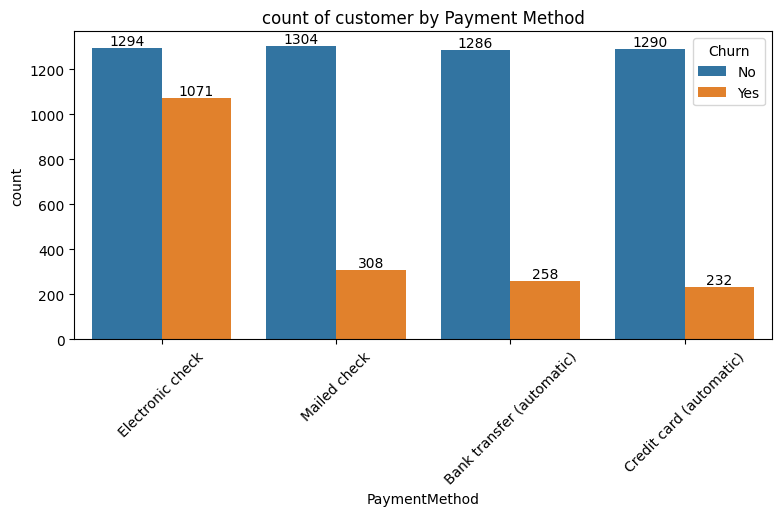

In [151]:
plt.figure(figsize = (9,4))
ax= sns.countplot(x = "PaymentMethod" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customer by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#So here we can observe where there is electronic check the churn is much higher in compare to other payment methods.... so the conclusion is customer is likely to churn when he is using electronic check as a payment method